In [8]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [9]:
# read the raw csv file(/s)
movie_file = ("Resources/movies_metadata.csv")

In [10]:
#read the movie file and create a dataframe

movie_data_df = pd.read_csv(movie_file)

#list the column types
#movie_data_df.dtypes


C:\Users\sinan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#cleanup and filter steps ( budget, revenue , release year)

movie_data_df = movie_data_df.drop(columns=['adult', 'production_countries','belongs_to_collection','homepage','id','imdb_id','overview','poster_path','runtime','spoken_languages','tagline','original_title','video'])

print( f'Inital count of data from file: {len(movie_data_df)}')

clean_movie_data_df = movie_data_df.loc[movie_data_df["budget"] != 0  ]
print( f'count after filtering out $0 budget: {len(clean_movie_data_df)}')

clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["revenue"] != 0  ]
print( f'count after filtering out $0 revenue: {len(clean_movie_data_df)}')

clean_movie_data_df['release_year']= pd.to_datetime(clean_movie_data_df["release_date"]).dt.year 
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["release_year"] < 2019 ]
print( f'count after filtering out movies in future date: {len(clean_movie_data_df)}')

clean_movie_data_df['net_loss_profit'] = clean_movie_data_df["revenue"] - clean_movie_data_df["budget"]



Inital count of data from file: 45291
count after filtering out $0 budget: 8886
count after filtering out $0 revenue: 5381
count after filtering out movies in future date: 5364


In [12]:
# convert number columns: revenue, budget, net_loss_profit to numeric for sorting purposes
clean_movie_data_df['revenue'] = pd.to_numeric(clean_movie_data_df['revenue'])
clean_movie_data_df['budget'] = pd.to_numeric(clean_movie_data_df['budget'])
clean_movie_data_df['net_loss_profit'] = pd.to_numeric(clean_movie_data_df['net_loss_profit'])
clean_movie_data_df['popularity'] = pd.to_numeric(clean_movie_data_df['popularity'])
clean_movie_data_df['popularity'] = pd.to_numeric(clean_movie_data_df['popularity'])



In [13]:
# extract the Genre from the column that has a list of dictionaries
clean_movie_data_df['Primary Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in clean_movie_data_df.iterrows()]
print(clean_movie_data_df[['net_loss_profit','Primary Genre', 'release_year', 'title', 'popularity' ,'vote_average','vote_count']])



       net_loss_profit    Primary Genre  release_year  \
0          343554033.0        Animation          1995   
1          197797249.0        Adventure          1995   
3           65452156.0           Comedy          1995   
5          127436818.0           Action          1995   
8           29350171.0           Action          1995   
9          294194034.0        Adventure          1995   
10          45879496.0           Comedy          1995   
13         -30318235.0          History          1995   
14         -87982678.0           Action          1995   
15          64112375.0            Drama          1995   
16         118500000.0            Drama          1995   
17            300000.0            Crime          1995   
18         182385533.0            Crime          1995   
19         -24568887.0           Action          1995   
20          84851622.0           Comedy          1995   
22         -19696928.0           Action          1995   
24          46200000.0         

In [14]:

clean_movie_group = clean_movie_data_df.groupby(["Primary Genre"])

clean_movie_group.describe()

budget                                                      \
                  count          mean           std        min          25%   
Primary Genre                                                                 
                   12.0  3.249167e+06  3.886423e+06   200000.0    475000.00   
Action            960.0  4.556441e+07  5.050394e+07        1.0  10000000.00   
Adventure         412.0  6.362545e+07  6.272450e+07       30.0  15762500.00   
Animation         146.0  6.629852e+07  5.478870e+07   590235.0  24250000.00   
Comedy           1066.0  2.162698e+07  2.208517e+07        1.0   5000000.00   
Crime             265.0  2.193342e+07  2.218353e+07      500.0   4500000.00   
Documentary        48.0  3.907696e+06  6.562789e+06        4.0    400000.00   
Drama            1308.0  1.979963e+07  2.440693e+07        1.0   4000000.00   
Family             55.0  5.927351e+07  5.612680e+07   143149.0  18500000.00   
Fantasy           140.0  4.719053e+07  4.986073e+07        8.0  13000000.00   
Foreign             4.0  2.099340e+06  3.547051e+06    22361.0    174340.25   
History            29.0  2.324162e+07  2.986426e+07   600000.0   5000000.00   
Horror            325.0  1.398987e+07  1.825540e+07       10.0   3000000.00   
Music              34.0  2.048982e+07  1.797503e+07       15.0   5250000.00   
Mystery            67.0  2.175360e+07  2.385012e+07      500.0   4500000.00   
Romance           120.0  2.144933e+07  2.279572e+07        1.0   4275000.00   
Science Fiction   104.0  4.958214e+07  5.288709e+07     7000.0  11625000.00   
TV Movie            1.0  5.000000e+06           NaN  5000000.0   5000000.00   
Thriller          199.0  2.869535e+07  3.231423e+07        2.0   6140000.00   
War                38.0  3.217148e+07  3.411286e+07        8.0  10000000.00   
Western            31.0  2.173796e+07  3.908832e+07   200000.0   2250000.00   

                                                     net_loss_profit  \
                        50%         75%          max           count   
Primary Genre                                                          
                  2000000.0   3525000.0   13000000.0            12.0   
Action           28500000.0  60000000.0  280000000.0           960.0   
Adventure        40000000.0  95750000.0  380000000.0           412.0   
Animation        59500000.0  93000000.0  260000000.0           146.0   
Comedy           15000000.0  30000000.0  165000000.0          1066.0   
Crime            15000000.0  32000000.0  108000000.0           265.0   
Documentary       1100000.0   3625000.0   35866397.0            48.0   
Drama            12000000.0  25000000.0  200000000.0          1308.0   
Family           35000000.0  77500000.0  200000000.0            55.0   
Fantasy          27500000.0  65000000.0  258000000.0           140.0   
Foreign            487500.0   2412500.0    7400000.0             4.0   
History          14000000.0  25000000.0  140000000.0            29.0   
Horror            7400000.0  19000000.0  160000000.0           325.0   
Music            16500000.0  30750000.0   70000000.0            34.0   
Mystery          15000000.0  27000000.0   84000000.0            67.0   
Romance          14000000.0  30000000.0  105000000.0           120.0   
Science Fiction  27500000.0  75000000.0  220000000.0           104.0   
TV Movie          5000000.0   5000000.0    5000000.0             1.0   
Thriller         17000000.0  40000000.0  209000000.0           199.0   
War              19250000.0  46250000.0  155000000.0            38.0   
Western           5500000.0  15000000.0  145000000.0            31.0   

                                ...    vote_average      vote_count  \
                         mean   ...             75%  max      count   
Primary Genre                   ...                                   
                 1.163198e+07   ...           6.150  7.4       12.0   
Action           7.765106e+07   ...           6.600  8.2      960.0   
Adventure        1.370229e+08   ... 

In [15]:
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_netProfit = clean_movie_data_df.sort_values(by='net_loss_profit', ascending = False)

# output csv file sort by revenue data
#sort_by_netProfit.to_csv("net_profit_loss.csv", encoding='utf-8')

# print to terminal
sort_by_netProfit.head()

top_10_profitable_mv = sort_by_netProfit[:10][['title','net_loss_profit','Primary Genre']].reset_index()

print(top_10_profitable_mv)


   index                                         title  net_loss_profit  \
0  14528                                        Avatar     2.550965e+09   
1  26484                  Star Wars: The Force Awakens     1.823224e+09   
2   1637                                       Titanic     1.645034e+09   
3  25016                                Jurassic World     1.363529e+09   
4  28754                                     Furious 7     1.316249e+09   
5  17782                                  The Avengers     1.299558e+09   
6  17401  Harry Potter and the Deathly Hallows: Part 2     1.217000e+09   
7  26487                       Avengers: Age of Ultron     1.125404e+09   
8  22054                                        Frozen     1.124219e+09   
9  42070                          Beauty and the Beast     1.102886e+09   

     Primary Genre  
0           Action  
1           Action  
2            Drama  
3           Action  
4           Action  
5  Science Fiction  
6           Family  
7     

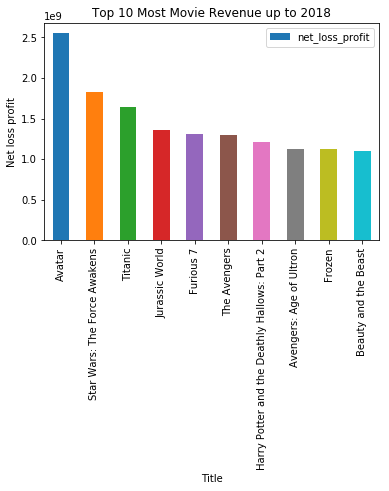

<Figure size 432x288 with 0 Axes>

In [16]:
# bar graph

ax = top_10_profitable_mv.plot.bar(x='title', y='net_loss_profit', rot = 90)

x_axis = np.arange(len(top_10_profitable_mv))

tick_locations = [value for value in x_axis]

ax.set_title('Top 10 Most Movie Revenue up to 2018')
ax.set_xlabel('Title')
ax.set_ylabel('Net loss profit')

# ax.text(set_xlabel,set_ylabel, "String", fontsize=12)


# plt.xticks(tick_locations, top_10_profitable_mv["net_loss_profit"], rotation = "vertical")

plt.show()
plt.tight_layout()


# ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')

# x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0, 
#             121740.0, 123980.0, 126220.0, 128460.0, 130700.0]
# # ax.set_xticklabels(x_labels)
# ax.text(x_labels)

In [16]:
#draw a pie chart for net_profit_loss and average - mandar

In [17]:
#votes to primary genre - hasan
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_vote_count = clean_movie_data_df.sort_values(by='vote_count', ascending = False)

# output csv file sort by revenue data
#sort_by_vote_count.to_csv("vote_count_loss.csv", encoding='utf-8')

# print to terminal
sort_by_vote_count.head()

top_10_profitable_mv = sort_by_vote_count[:10][['title','vote_count','Primary Genre']].reset_index()

print(top_10_profitable_mv)



   index                    title  vote_count    Primary Genre
0  15454                Inception     14075.0           Action
1  12466          The Dark Knight     12269.0            Drama
2  14528                   Avatar     12114.0           Action
3  17782             The Avengers     12000.0  Science Fiction
4  26493                 Deadpool     11444.0           Action
5  22820             Interstellar     11187.0        Adventure
6  20004         Django Unchained     10297.0            Drama
7  23693  Guardians of the Galaxy     10014.0           Action
8   2841               Fight Club      9678.0            Drama
9  18205         The Hunger Games      9634.0  Science Fiction


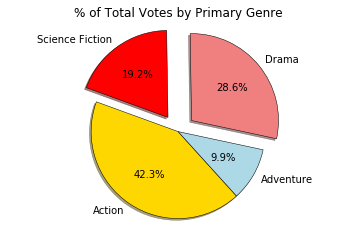

In [20]:
vote_count_sum = top_10_profitable_mv.groupby('Primary Genre').sum()["vote_count"]

labels = vote_count_sum.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0, 0, 0.2,0.2)

plt.title('% of Total Votes by Primary Genre')
plt.axis('equal')

plt.pie(vote_count_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

In [34]:
#calculate p value , r2 , coeffi

In [35]:
# no of movies count to genre - Helen